<a href="https://colab.research.google.com/github/DrsimpleMugo/Rice-Disease-Classifier/blob/main/Rice_Leaf_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
data_dir ="/content/drive/MyDrive/rice_leaf_diseases"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [ ]:
train_path = '/content/drive/MyDrive/rice_leaf_diseases/Train'
test_path = '/content/drive/MyDrive/rice_leaf_diseases/Test'

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 90 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

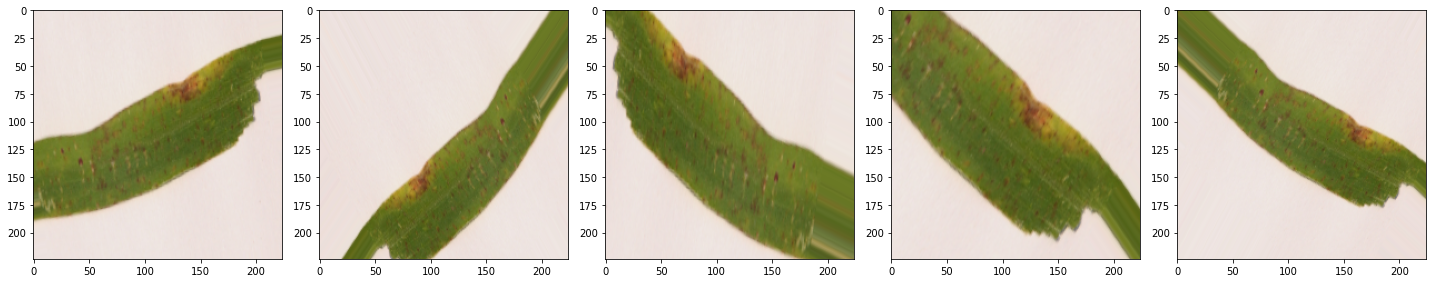

In [ ]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

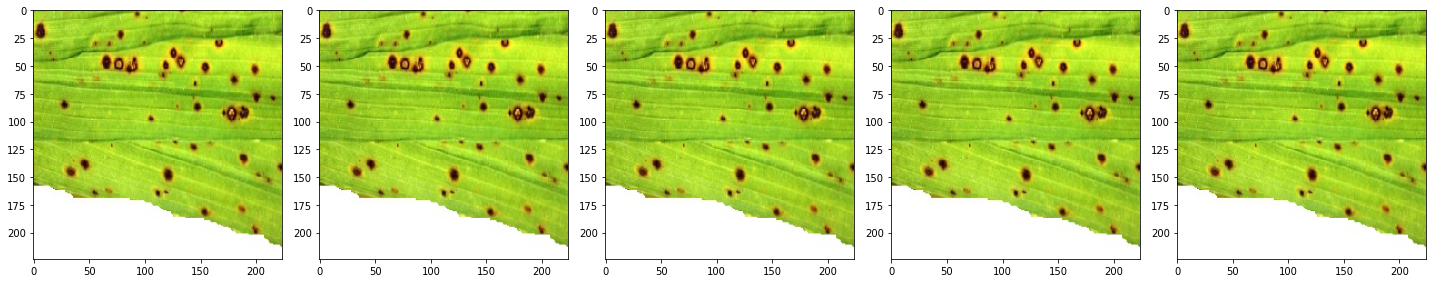

In [ ]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [ ]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)            

In [ ]:
EPOCHS=50
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
12/12 [==============================] - 10s 756ms/step - loss: 1.5939 - accuracy: 0.3222 - val_loss: 1.0947 - val_accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 9s 730ms/step - loss: 1.1127 - accuracy: 0.2889 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 9s 737ms/step - loss: 1.0680 - accuracy: 0.3333 - val_loss: 1.1975 - val_accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 9s 741ms/step - loss: 1.0198 - accuracy: 0.4000 - val_loss: 1.0771 - val_accuracy: 0.3000
Epoch 5/50
12/12 [==============================] - 9s 725ms/step - loss: 1.0590 - accuracy: 0.3556 - val_loss: 1.0857 - val_accuracy: 0.3333
Epoch 6/50
12/12 [==============================] - 9s 731ms/step - loss: 1.0508 - accuracy: 0.4111 - val_loss: 1.1240 - val_accuracy: 0.4000
Epoch 7/50
12/12 [==============================] - 9s 726ms/step - loss: 1.0522 - accuracy: 0.4333 - val_loss: 1.0860 - val_accuracy: 0.3000
Epoch

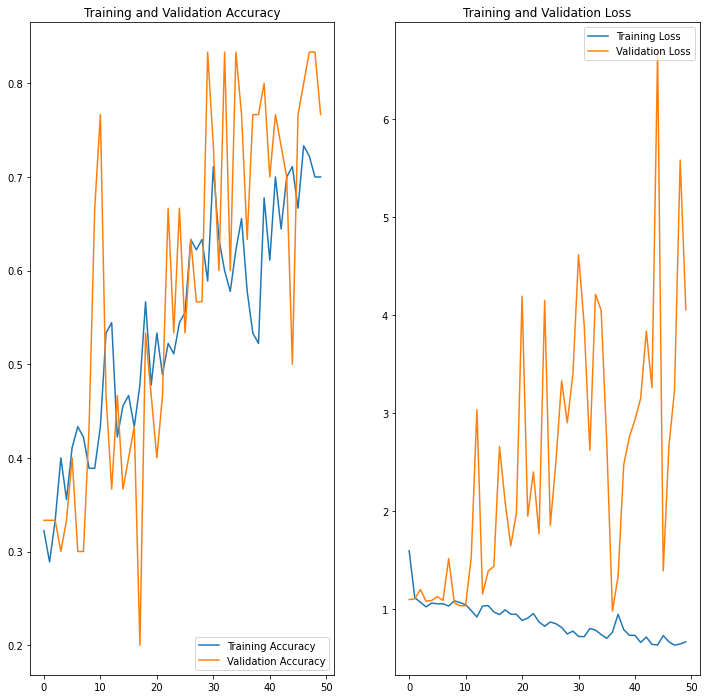

In [ ]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/rice_leaf_diseases/rice.h5')

In [ ]:
model =load_model('/content/drive/MyDrive/rice_leaf_diseases/rice.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/rice_leaf_diseases/Train/Bacterial leaf blight/DSC_0383.JPG',target_size=(224,224))

In [ ]:
x = image.img_to_array(img)

x

array([[[233., 218., 213.],
        [235., 222., 216.],
        [228., 211., 203.],
        ...,
        [224., 206., 202.],
        [227., 210., 203.],
        [227., 210., 202.]],

       [[234., 219., 214.],
        [232., 217., 212.],
        [232., 214., 210.],
        ...,
        [226., 209., 202.],
        [228., 211., 204.],
        [227., 210., 203.]],

       [[236., 221., 216.],
        [234., 216., 212.],
        [236., 218., 216.],
        ...,
        [226., 209., 202.],
        [226., 208., 204.],
        [229., 212., 205.]],

       ...,

       [[234., 219., 214.],
        [234., 219., 214.],
        [235., 220., 215.],
        ...,
        [229., 210., 203.],
        [229., 210., 203.],
        [230., 211., 205.]],

       [[237., 219., 215.],
        [234., 219., 214.],
        [236., 221., 216.],
        ...,
        [230., 212., 202.],
        [230., 211., 204.],
        [232., 213., 207.]],

       [[238., 220., 216.],
        [234., 219., 214.],
        [235., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/255

In [ ]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input
x=np.expand_dims(x, axis = 0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
prediction = model.predict(img_data)

prediction

array([[0., 0., 1.]], dtype=float32)

In [ ]:
class_img = np.argmax(prediction, axis = 1)

class_img

array([2])